# Credit default prediction 

In [4]:
# Importing libraries
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN
import itertools

from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,mean_absolute_error, mean_squared_error, classification_report, roc_curve, auc, f1_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from pathlib import Path
import matplotlib.pyplot as plt

import math 
from datetime import date, timedelta
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading the data
csv_path1 = Path('Data/cs-training.csv')
credit_train_df=pd.read_csv(csv_path1, index_col=False,header=0).drop(['Unnamed: 0'], axis=1)
credit_train_df.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [6]:
credit_train_df.shape

(150000, 11)

In [7]:
# Reading the data
csv_path2 = Path('Data/cs-test.csv')
credit_test_df=pd.read_csv(csv_path2, index_col=False,header=0).drop(['Unnamed: 0'], axis=1)
credit_test_df.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0


In [8]:
# Checking for null
credit_train_df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [9]:
# Imputing NAN, NA, NULL values
values = {'MonthlyIncome':credit_train_df['MonthlyIncome'].mean(),'NumberOfDependents':credit_train_df['NumberOfDependents'].mean()}
credit_train_df1 = credit_train_df.fillna(value=values)
credit_train_df = credit_train_df1.drop(['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse'], axis = 1)

In [10]:
# Rechecking for nulls
credit_train_df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfDependents                      0
dtype: int64

In [11]:
# Imputing NAN, NA, NULL values
values = {'MonthlyIncome':credit_test_df['MonthlyIncome'].mean(),'NumberOfDependents':credit_test_df['NumberOfDependents'].mean()}
credit_test_df1 = credit_test_df.fillna(value=values)
credit_test_df = credit_test_df1.drop(['NumberOfTime60-89DaysPastDueNotWorse'], axis = 1)

In [12]:
# Creating new variable to input features and labels
X = credit_train_df.iloc[:,1:]
y = credit_train_df['SeriousDlqin2yrs']

X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [13]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X, y,
                                test_size=0.2,
                                random_state=42)
display(X_train.head(2))
display(X_test.head(2))

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
104025,0.000000,29,0.011513,4342.0,5,0,0,0.0
5415,0.595526,55,0.835333,1833.0,11,0,1,0.0


,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
59770,0.02969,57,0.283244,10121.0,7,0,1,0.0
21362,0.00000,57,0.142562,7750.0,9,0,1,0.0


<AxesSubplot:ylabel='SeriousDlqin2yrs'>

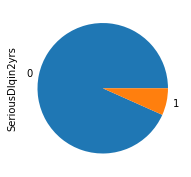

In [14]:
# Visualizing imbalance in the dataset
df = credit_train_df['SeriousDlqin2yrs'].value_counts()
df.plot.pie(figsize=(3, 3))

In [30]:
# Applying SMOTE for the data imbalance
imb = SMOTE(random_state=42, sampling_strategy=0.08)
X_train_imb, y_train_imb = imb.fit_sample(X_train,y_train)

In [16]:
X_train_imb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93384 entries, 0 to 93383
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  93384 non-null  float64
 1   age                                   93384 non-null  int64  
 2   DebtRatio                             93384 non-null  float64
 3   MonthlyIncome                         93384 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans       93384 non-null  int64  
 5   NumberOfTimes90DaysLate               93384 non-null  int64  
 6   NumberRealEstateLoansOrLines          93384 non-null  int64  
 7   NumberOfDependents                    93384 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 5.7 MB


In [17]:
X_train_imb.describe()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
count,93384.000000,93384.000000,93384.000000,9.338400e+04,93384.000000,93384.000000,93384.000000,93384.000000
mean,6.022884,53.827551,353.511111,6.851549e+03,8.505161,0.134777,1.020828,0.721903
std,272.081092,14.886441,2077.524724,1.513176e+04,5.050086,2.959872,1.107118,1.077346
min,0.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.025272,43.000000,0.170882,4.000000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.122119,54.000000,0.360268,6.670221e+03,8.000000,0.000000,1.000000,0.000000
75%,0.456087,64.000000,0.877075,7.594000e+03,11.000000,0.000000,2.000000,1.000000
max,50708.000000,109.000000,326442.000000,3.008750e+06,58.000000,98.000000,54.000000,10.000000


<AxesSubplot:title={'center':'Credit_Train_Coorrelation'}>

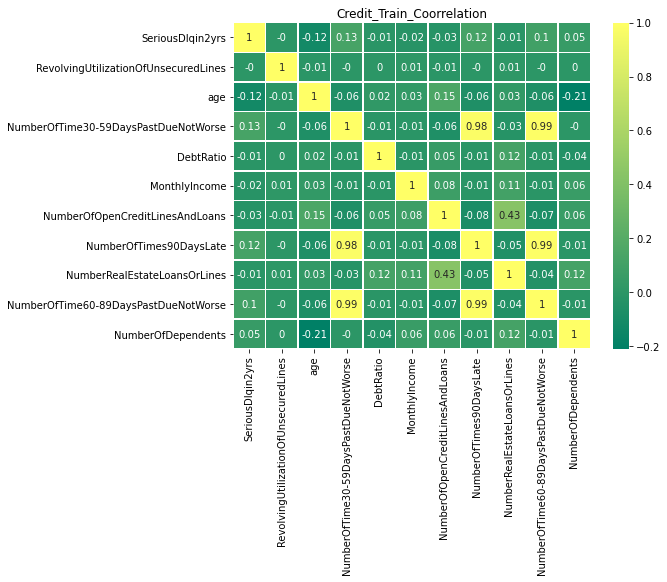

In [15]:
# Correlation before removing highly correlated column
plt.figure(figsize=[8,6])
plt.title("Credit_Train_Coorrelation")
sns.heatmap(credit_train_df1.corr().round(2), linewidths=.5, annot=True,cmap="summer")

<AxesSubplot:title={'center':'Credit_Train_Coorrelation'}>

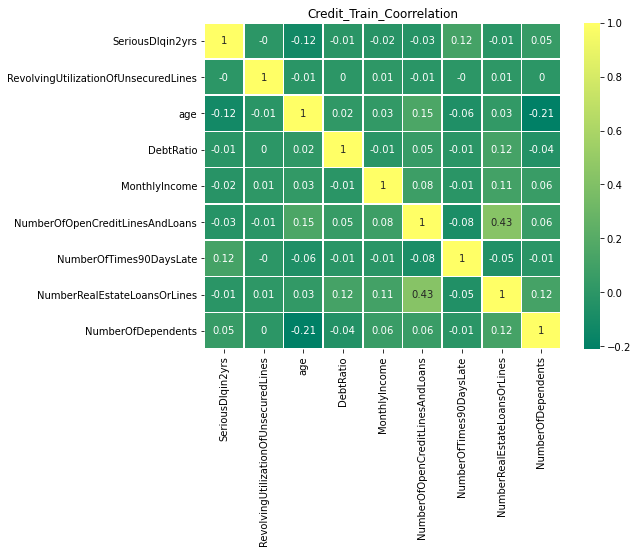

In [16]:
# Correlation after removing highly correlated column
plt.figure(figsize=[8,6])
plt.title("Credit_Train_Coorrelation")
sns.heatmap(credit_train_df.corr().round(2), linewidths=.5, annot=True,cmap="summer")

In [17]:
# Checking for multicollinearity in the data set
# VIF above 4 indicates that multicollinearity might exist. When VIF is higher than 10, there is significant multicollinearity in the data set.
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.sort_values(by=["VIF Factor"], ascending=False)

,Features,VIF Factor
4,NumberOfOpenCreditLinesAndLoans,4.496808
1,age,3.659316
6,NumberRealEstateLoansOrLines,2.301670
7,NumberOfDependents,1.416596
3,MonthlyIncome,1.287473
2,DebtRatio,1.048230
5,NumberOfTimes90DaysLate,1.004492
0,RevolvingUtilizationOfUnsecuredLines,1.000780


In [18]:
# Detect the highly correlated column pairs - before clean up
mask_up = np.triu(np.ones(credit_train_df1.corr().shape)).astype(bool)

# Find the highly correlated pairs
correlated_pairs = credit_train_df1.corr().mask(mask_up).abs().unstack().sort_values(ascending=False)
correlated_pairs = pd.DataFrame(correlated_pairs)
highly_correlated = correlated_pairs[correlated_pairs[0]>0.75]
display("Highly Correlated Features Before clean up", highly_correlated)

'Highly Correlated Features Before clean up'

0
NumberOfTimes90DaysLate              NumberOfTime60-89DaysPastDueNotWorse  0.992796
NumberOfTime30-59DaysPastDueNotWorse NumberOfTime60-89DaysPastDueNotWorse  0.987005
                                     NumberOfTimes90DaysLate               0.983603

In [19]:
# Detect the highly correlated column pairs - after clean up
mask_up = np.triu(np.ones(credit_train_df.corr().shape)).astype(bool)

# Find the highly correlated pairs
correlated_pairs = credit_train_df.corr().mask(mask_up).abs().unstack().sort_values(ascending=False)
correlated_pairs = pd.DataFrame(correlated_pairs)
highly_correlated = correlated_pairs[correlated_pairs[0]>0.75]
display("Highly Correlated Features After Clean up", highly_correlated)

'Highly Correlated Features After Clean up'

,,0


# Models

## Parameter tuning using grid search cross validation

GridSearchCV is a method to search the candidate best parameters exhaustively from the grid of given parameters. 
Target estimator (model) and parameters for search need to be provided for this cross-validation search method. 
GridSearchCV is useful when we are looking for the best parameter for the target model and dataset, multiple parameters are tested by cross-validation and the best parameters can be extracted to apply for a predictive model.
Exhaustive search over specified parameter values for an estimator.
Important members are fit, predict.
GridSearchCV implements a “fit” and a “score” method. 
It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

In [18]:
# Multi-layer Perceptron classifier grid search 
parameters = {'hidden_layer_sizes':[(50,),(100,),(200,)], 'learning_rate':['constant', 'adaptive'], 'early_stopping':[True, False]}
model = MLPClassifier(random_state=42)

mlp_grid = GridSearchCV(model, parameters, scoring="f1")
mlp_grid.fit(X_train_imb, y_train_imb)
df = pd.DataFrame(mlp_grid.cv_results_)
df.to_csv("Data/mlp_grid_search.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_early_stopping,param_hidden_layer_sizes,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,34.802322,22.497365,0.078391,0.016606,True,"(50,)",constant,"{'early_stopping': True, 'hidden_layer_sizes':...",0.767739,0.774711,0.605236,0.640754,0.642813,0.686251,0.070690,5
1,25.547352,13.479093,0.062488,0.000001,True,"(50,)",adaptive,"{'early_stopping': True, 'hidden_layer_sizes':...",0.767739,0.774711,0.605236,0.640754,0.642813,0.686251,0.070690,5
2,26.841195,12.299239,0.118937,0.012343,True,"(100,)",constant,"{'early_stopping': True, 'hidden_layer_sizes':...",0.768117,0.664247,0.663518,0.680934,0.636124,0.682588,0.045115,7
3,28.688828,14.614043,0.134346,0.007651,True,"(100,)",adaptive,"{'early_stopping': True, 'hidden_layer_sizes':...",0.768117,0.664247,0.663518,0.680934,0.636124,0.682588,0.045115,7
4,53.680255,32.262393,0.241573,0.024174,True,"(200,)",constant,"{'early_stopping': True, 'hidden_layer_sizes':...",0.688916,0.585636,0.767269,0.765502,0.653134,0.692091,0.069139,3
5,51.793058,30.815082,0.231857,0.014399,True,"(200,)",adaptive,"{'early_stopping': True, 'hidden_layer_sizes':...",0.688916,0.585636,0.767269,0.765502,0.653134,0.692091,0.069139,3
6,38.469514,14.161225,0.071857,0.007654,False,"(50,)",constant,"{'early_stopping': False, 'hidden_layer_sizes'...",0.668620,0.775026,0.561909,0.633715,0.721919,0.672238,0.073080,9
7,38.420893,14.319335,0.068733,0.007654,False,"(50,)",adaptive,"{'early_stopping': False, 'hidden_layer_sizes'...",0.668620,0.775026,0.561909,0.633715,0.721919,0.672238,0.073080,9
8,58.619702,10.838781,0.143716,0.024997,False,"(100,)",constant,"{'early_stopping': False, 'hidden_layer_sizes'...",0.772675,0.729059,0.772954,0.770857,0.284675,0.666044,0.191415,11
9,58.291033,11.240752,0.143712,0.020725,False,"(100,)",adaptive,"{'early_stopping': False, 'hidden_layer_sizes'...",0.772675,0.729059,0.772954,0.770857,0.284675,0.666044,0.191415,11


In [19]:
# Random Forest grid search 
parameters = {'max_depth':[None, 10, 7, 5], 'min_samples_split':[2, 3, 4]}
model = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(model, parameters, scoring="f1")
rf_grid.fit(X_train_imb, y_train_imb)
rf_df = pd.DataFrame(rf_grid.cv_results_)
rf_df.to_csv("Data/rf_grid_search.csv")
rf_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,25.310275,0.700648,1.073070,0.006497,None,2,"{'max_depth': None, 'min_samples_split': 2}",0.851247,0.923767,0.920758,0.922034,0.921386,0.907838,0.028314,1
1,24.776816,0.271575,1.060941,0.002633,None,3,"{'max_depth': None, 'min_samples_split': 3}",0.849995,0.922669,0.920687,0.920226,0.920065,0.906729,0.028382,2
2,24.754575,0.388856,1.049980,0.007630,None,4,"{'max_depth': None, 'min_samples_split': 4}",0.847081,0.921379,0.918423,0.918836,0.918998,0.904944,0.028950,3
3,16.062365,0.085545,0.518840,0.006156,10,2,"{'max_depth': 10, 'min_samples_split': 2}",0.802023,0.842774,0.839905,0.838511,0.838609,0.832364,0.015249,6
4,16.081151,0.088136,0.513415,0.007049,10,3,"{'max_depth': 10, 'min_samples_split': 3}",0.803775,0.842098,0.839906,0.840472,0.838960,0.833042,0.014669,4
5,15.985941,0.016990,0.515498,0.000026,10,4,"{'max_depth': 10, 'min_samples_split': 4}",0.801188,0.840906,0.838064,0.841623,0.841402,0.832637,0.015776,5
6,12.545530,0.159103,0.371789,0.011682,7,2,"{'max_depth': 7, 'min_samples_split': 2}",0.790908,0.822744,0.816575,0.817374,0.819436,0.813407,0.011450,8
7,12.493790,0.032269,0.372019,0.006379,7,3,"{'max_depth': 7, 'min_samples_split': 3}",0.790654,0.822683,0.816212,0.816984,0.819073,0.813121,0.011455,9
8,12.484400,0.023560,0.367124,0.006993,7,4,"{'max_depth': 7, 'min_samples_split': 4}",0.790751,0.823405,0.817848,0.817394,0.819550,0.813790,0.011712,7
9,9.743750,0.069629,0.293888,0.005801,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.781464,0.804473,0.799916,0.800607,0.802331,0.797758,0.008298,10


In [20]:
# AdaBoost classifier using grid search
# The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.

parameters = {'algorithm':['SAMME', 'SAMME.R']}
model = AdaBoostClassifier(random_state=42)

adb_grid = GridSearchCV(model, parameters, scoring="f1")
adb_grid.fit(X_train_imb, y_train_imb)
adb_grid = pd.DataFrame(adb_grid.cv_results_)
adb_grid.to_csv("Data/adb_grid_search.csv")
adb_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.072578,0.039457,0.137471,0.006250,SAMME,{'algorithm': 'SAMME'},0.787428,0.818954,0.818312,0.820244,0.825411,0.814070,0.013553,2
1,6.926678,0.020953,0.251557,0.003274,SAMME.R,{'algorithm': 'SAMME.R'},0.787165,0.854660,0.852102,0.849619,0.852273,0.839164,0.026048,1


In [21]:
# K-nearest neighbors using grid search GridSearch
parameters = {'n_neighbors':[3, 5, 10, 15]}
model = KNeighborsClassifier()

knn_grid = GridSearchCV(model, parameters, scoring="f1")
knn_grid.fit(X_train_imb, y_train_imb)
knn_grid = pd.DataFrame(knn_grid.cv_results_)
knn_grid.to_csv("Data/knn_grid_search.csv")
knn_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.738980,0.024562,4.131916,0.058160,3,{'n_neighbors': 3},0.865325,0.856626,0.858955,0.857507,0.856851,0.859053,0.003240,1
1,0.729165,0.017209,4.403775,0.051293,5,{'n_neighbors': 5},0.851246,0.845314,0.846676,0.844250,0.843665,0.846230,0.002709,2
2,0.729985,0.006320,4.784281,0.069201,10,{'n_neighbors': 10},0.829036,0.827688,0.827917,0.824458,0.826561,0.827132,0.001551,3
3,0.727025,0.016581,5.032832,0.078927,15,{'n_neighbors': 15},0.806579,0.809032,0.809330,0.807166,0.807829,0.807987,0.001056,4


In [22]:
# Decision tree classifer using GridSearch
parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_depth':[None, 10, 7, 5], 'min_samples_split':[2, 3, 4]}
model = DecisionTreeClassifier(random_state=42)

dtc_grid = GridSearchCV(model, parameters, scoring="f1")
dtc_grid.fit(X_train_imb, y_train_imb)
dtc_grid = pd.DataFrame(dtc_grid.cv_results_)
dtc_grid.to_csv("Data/dtc_grid_search.csv")
dtc_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.049010,0.044433,0.021889,0.007673,gini,None,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.802979,0.887865,0.886539,0.886136,0.887704,0.870245,0.033639,4
1,0.317379,0.013839,0.024995,0.007653,gini,None,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.800617,0.865831,0.869306,0.872283,0.861942,0.853996,0.026912,7
2,1.032793,0.044919,0.025002,0.007660,gini,None,3,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.801375,0.887647,0.887067,0.886900,0.886671,0.869932,0.034280,5
3,0.311129,0.012488,0.028117,0.006247,gini,None,3,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.795136,0.861463,0.870611,0.875160,0.862209,0.852916,0.029346,9
4,1.039803,0.039052,0.018746,0.006249,gini,None,4,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.800424,0.887245,0.884922,0.886724,0.886806,0.869224,0.034409,6


In [23]:
# SGD Classifier using grid search
parameters = {'penalty':['l2','l1','elasticnet'], 'learning_rate':['constant','optimal','invscaling','adaptive'], 'eta0':[0.001, 0.05, 0.01, 0.1, 0.5, 1]}
model = SGDClassifier(random_state=42)

sgd_grid = GridSearchCV(model, parameters, scoring="f1")
sgd_grid.fit(X_train_imb, y_train_imb)
sgd_grid = pd.DataFrame(sgd_grid.cv_results_)
sgd_grid.to_csv("Data/sgd_grid_search.csv")
sgd_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.342557,0.143759,0.020259,0.006218,0.001,constant,l2,"{'eta0': 0.001, 'learning_rate': 'constant', '...",0.666326,0.666667,0.654341,0.068853,0.666717,0.544581,0.237911,20
1,0.380201,0.136754,0.012498,0.006249,0.001,constant,l1,"{'eta0': 0.001, 'learning_rate': 'constant', '...",0.528877,0.048514,0.012862,0.105242,0.659651,0.271029,0.268760,67
2,0.332981,0.067688,0.015614,0.000012,0.001,constant,elasticnet,"{'eta0': 0.001, 'learning_rate': 'constant', '...",0.666046,0.010387,0.012600,0.034902,0.672417,0.279271,0.318524,65
3,0.649860,0.101046,0.015616,0.000013,0.001,optimal,l2,"{'eta0': 0.001, 'learning_rate': 'optimal', 'p...",0.329996,0.666657,0.046143,0.666577,0.650100,0.471895,0.248592,31
4,1.089366,0.365824,0.012490,0.006245,0.001,optimal,l1,"{'eta0': 0.001, 'learning_rate': 'optimal', 'p...",0.667603,0.276614,0.665526,0.667592,0.113537,0.478174,0.236833,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.626210,0.108857,0.015598,0.000018,1,invscaling,l1,"{'eta0': 1, 'learning_rate': 'invscaling', 'pe...",0.517510,0.666607,0.126260,0.044288,0.651238,0.401181,0.264373,46
68,0.745426,0.100137,0.009374,0.007654,1,invscaling,elasticnet,"{'eta0': 1, 'learning_rate': 'invscaling', 'pe...",0.518210,0.666657,0.646287,0.040237,0.461630,0.466604,0.226620,37
69,2.877504,0.502112,0.015609,0.000016,1,adaptive,l2,"{'eta0': 1, 'learning_rate': 'adaptive', 'pena...",0.655189,0.650028,0.653311,0.651225,0.649456,0.651842,0.002132,14
70,3.217539,0.095697,0.018726,0.006243,1,adaptive,l1,"{'eta0': 1, 'learning_rate': 'adaptive', 'pena...",0.655446,0.657047,0.652359,0.648164,0.655072,0.653617,0.003116,11


In [24]:
# Logistic Regression using grid search
parameters = {'penalty':['l2','l1','elasticnet'], 'C':[1, 10, 50, 100, 200, 500], 'solver':['newton-cg','lbfgs','liblinear','sag','saga']}
model = LogisticRegression(random_state=42)

lr_grid = GridSearchCV(model, parameters, scoring="f1")
lr_grid.fit(X_train_imb, y_train_imb)
lr_grid = pd.DataFrame(lr_grid.cv_results_)
lr_grid.to_csv("Data/lr_grid_search.csv")
lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.768549,0.561887,0.015621,0.000001,1,l2,newton-cg,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",0.639476,0.639504,0.641455,0.636267,0.643513,0.640043,0.002404,1
1,1.480630,0.115124,0.015622,0.000003,1,l2,lbfgs,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.539455,0.494190,0.485864,0.569562,0.509609,0.519736,0.030900,19
2,1.556276,0.204305,0.015614,0.000017,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.641051,0.639333,0.640878,0.635487,0.641840,0.639718,0.002266,14
3,7.073943,0.009975,0.015608,0.009878,1,l2,sag,"{'C': 1, 'penalty': 'l2', 'solver': 'sag'}",0.000179,0.000089,0.000000,0.000089,0.000089,0.000089,0.000056,25
4,7.303589,0.013178,0.012489,0.006245,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.000179,0.000089,0.000000,0.000089,0.000089,0.000089,0.000056,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.018747,0.006247,0.000000,0.000000,500,elasticnet,newton-cg,"{'C': 500, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
86,0.015622,0.000005,0.000000,0.000000,500,elasticnet,lbfgs,"{'C': 500, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
87,0.015621,0.000002,0.000000,0.000000,500,elasticnet,liblinear,"{'C': 500, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
88,0.015630,0.000033,0.000000,0.000000,500,elasticnet,sag,"{'C': 500, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,84


In [25]:
# MLP with Standard Scaling using grid search CV
parameters = {'mlp__hidden_layer_sizes':[(50,),(100,),(200,)], 'mlp__learning_rate':['constant', 'adaptive'], 'mlp__early_stopping':[True, False]}
model = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(max_iter=1000, random_state=42))])

mlpsc_grid = GridSearchCV(model, parameters, scoring="f1")
mlpsc_grid.fit(X_train_imb, y_train_imb)
mlpsc_grid = pd.DataFrame(mlpsc_grid.cv_results_)
mlpsc_grid.to_csv("Data/mlpstsc_grid_search.csv")
mlpsc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp__early_stopping,param_mlp__hidden_layer_sizes,param_mlp__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,72.342229,12.035359,0.065609,0.006249,True,"(50,)",constant,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.781435,0.825285,0.825311,0.822369,0.823398,0.815560,0.017100,11
1,72.344550,12.767114,0.068734,0.007653,True,"(50,)",adaptive,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.781435,0.825285,0.825311,0.822369,0.823398,0.815560,0.017100,11
2,95.731045,21.088283,0.128095,0.006247,True,"(100,)",constant,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.779233,0.830834,0.821907,0.823503,0.824953,0.816086,0.018672,9
3,95.462322,20.683993,0.120234,0.006276,True,"(100,)",adaptive,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.779233,0.830834,0.821907,0.823503,0.824953,0.816086,0.018672,9
4,115.967213,18.703837,0.234323,0.009878,True,"(200,)",constant,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.784937,0.825001,0.827228,0.826505,0.822290,0.817192,0.016216,7
5,117.472014,16.742789,0.228502,0.007580,True,"(200,)",adaptive,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.784937,0.825001,0.827228,0.826505,0.822290,0.817192,0.016216,7
6,281.588604,29.792676,0.071976,0.006092,False,"(50,)",constant,"{'mlp__early_stopping': False, 'mlp__hidden_la...",0.790859,0.842832,0.827131,0.831632,0.831931,0.824877,0.017777,3
7,290.577598,46.810032,0.076672,0.004375,False,"(50,)",adaptive,"{'mlp__early_stopping': False, 'mlp__hidden_la...",0.790859,0.842832,0.827131,0.831632,0.831931,0.824877,0.017777,3
8,351.470026,79.530582,0.135848,0.011562,False,"(100,)",constant,"{'mlp__early_stopping': False, 'mlp__hidden_la...",0.768819,0.843085,0.828826,0.837614,0.823205,0.820310,0.026647,5
9,354.255786,82.139522,0.137446,0.008298,False,"(100,)",adaptive,"{'mlp__early_stopping': False, 'mlp__hidden_la...",0.768819,0.843085,0.828826,0.837614,0.823205,0.820310,0.026647,5


### Review of the cross validation --

In [18]:
# Identifying models with high scoring
import os

files = os.listdir(r"C:/Users/Endalkachew Desta/project_2/Data1/")
for file in files:
    df = pd.read_csv("Data1/"+file, index_col=0).sort_values(by=["rank_test_score"])
    print(file.split(".")[0], *df[df["rank_test_score"]==1]["params"], "\n")

adb_grid_search {'algorithm': 'SAMME.R'} 

dtc_grid_search {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 3, 'splitter': 'best'} 

knn_grid_search {'n_neighbors': 3} 

lr_grid_search {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'} 

mlpstsc_grid_search {'mlp__early_stopping': False, 'mlp__hidden_layer_sizes': (200,), 'mlp__learning_rate': 'constant'} {'mlp__early_stopping': False, 'mlp__hidden_layer_sizes': (200,), 'mlp__learning_rate': 'adaptive'} 

mlp_grid_search {'early_stopping': False, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant'} {'early_stopping': False, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive'} 

rf_grid_search {'max_depth': None, 'min_samples_split': 2} 

sgd_grid_search {'eta0': 0.1, 'learning_rate': 'adaptive', 'penalty': 'elasticnet'} 



In [19]:
# Collecting the scores 
models = []
mean_score = []
std_score = []
for file in files:
    model_score = pd.read_csv("Data1/"+file, index_col=0)
    models.append(file.split("_grid_search.csv")[0])
    mean_score.append(model_score[model_score["rank_test_score"]==1]["mean_test_score"].unique()[0])
    std_score.append(model_score[model_score["rank_test_score"]==1]["std_test_score"].unique()[0])
    
df_score = pd.DataFrame()
df_score["Models"] = models
df_score['mean_score'] = mean_score
df_score['std_score'] = std_score
df_score.sort_values(by=['mean_score'],ascending=False)

,Models,mean_score,std_score
6,rf,0.907838,0.028314
1,dtc,0.871502,0.034505
2,knn,0.859053,0.003240
0,adb,0.839164,0.026048
4,mlpstsc,0.830907,0.025741
5,mlp,0.713513,0.041447
7,sgd,0.668968,0.006422
3,lr,0.640043,0.002404


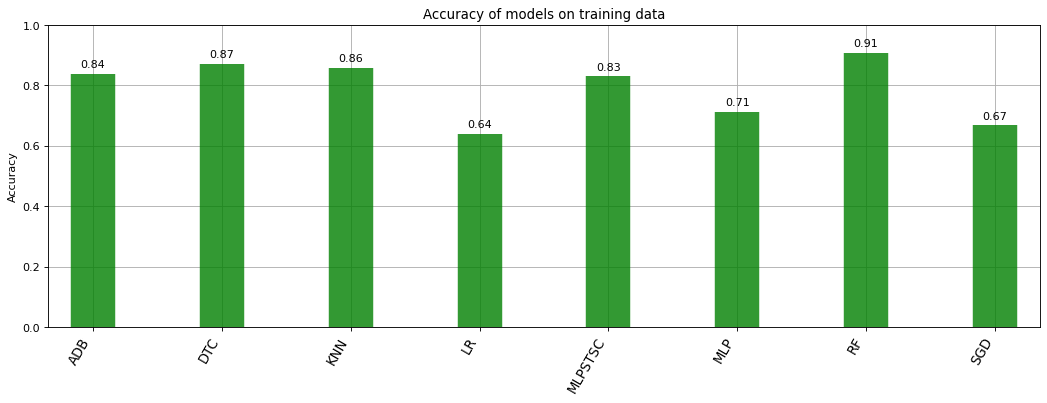

In [20]:
# df_score bar plot
fig, ax = plt.subplots(figsize=(16,5), facecolor='white', dpi= 80)
ax.vlines(x=df_score.Models, ymin=0, ymax=df_score.mean_score, color='g', alpha=0.8, linewidth=40)

# Annotate Text
for i, score in enumerate(df_score.mean_score):
    ax.text(i, score+0.02, round(score, 2), horizontalalignment='center')
    
ax.set_title('Accuracy of models on training data', fontdict={'size':12})
ax.set(ylabel='Accuracy', ylim=(0, 1))
plt.xticks(df_score.index, df_score.Models.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)
plt.grid()

Text(0, 0.5, 'F1 Score')

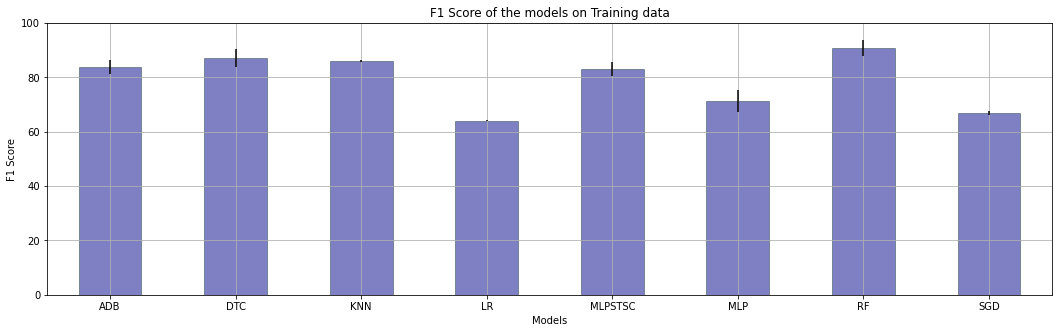

In [21]:
x_prior = [i.upper() for i in models]
x = []
for i in x_prior:
    if len(i.split("_")) == 2:
        x.append(i.split("_")[0]+"_SCALED")
    else:
        x.append(i)
        
y = [i*100 for i in mean_score]
yerr = [i*100 for i in std_score]
df = pd.DataFrame({'Models':x, 'Mean Accuracy':y, 'Std Accuracy':yerr})
df.plot.bar(x="Models", y="Mean Accuracy", yerr="Std Accuracy", color="darkblue", alpha=0.5, 
            edgecolor="darkslategray", title="F1 Score of the models on Training data", legend=False, figsize=[18,5], rot=0, grid=True, ylim=[0,100])
for i, score in enumerate(df_score.mean_score):
    ax.text(i, score+0.02, round(score, 2), horizontalalignment='center')
plt.ylabel("F1 Score")

## Validation 

[[27734   310]
 [ 1618   338]] 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     28044
           1       0.52      0.17      0.26      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.58      0.61     30000
weighted avg       0.92      0.94      0.92     30000



Text(0.5, 1.0, 'Random Forest Classifier ROC Curves')

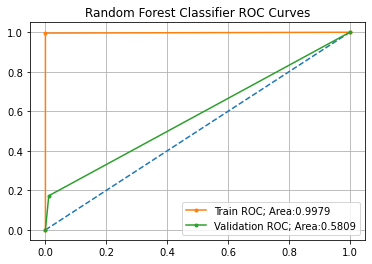

In [31]:
# Random Forest Classifier
rf = RandomForestClassifier(max_depth=None, min_samples_split=2, random_state=42)
rf.fit(X_train_imb, y_train_imb)
rf_pred = rf.predict(X_train_imb)
rf_val_pred = rf.predict(X_test)

print(confusion_matrix(Y_test,rf_val_pred),'\n')
print(classification_report(Y_test,rf_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, rf_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, rf_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("Random Forest Classifier ROC Curves")

[[26313  1731]
 [ 1453   503]] 

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     28044
           1       0.23      0.26      0.24      1956

    accuracy                           0.89     30000
   macro avg       0.59      0.60      0.59     30000
weighted avg       0.90      0.89      0.90     30000



Text(0.5, 1.0, 'Decision Tree Classifier ROC Curves')

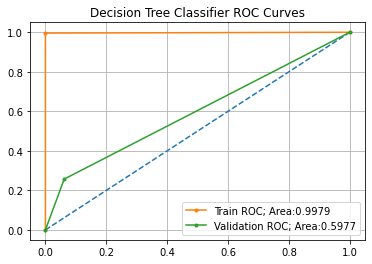

In [32]:
# Decision Tree classifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, splitter='best', random_state=42)
dtc.fit(X_train_imb, y_train_imb)
dtc_pred = dtc.predict(X_train_imb)
dtc_val_pred = dtc.predict(X_test)

print(confusion_matrix(Y_test,dtc_val_pred),'\n')
print(classification_report(Y_test,dtc_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, dtc_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, dtc_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("Decision Tree Classifier ROC Curves")

[[27604   440]
 [ 1867    89]] 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     28044
           1       0.17      0.05      0.07      1956

    accuracy                           0.92     30000
   macro avg       0.55      0.51      0.52     30000
weighted avg       0.89      0.92      0.90     30000



Text(0.5, 1.0, 'KNN Classifier ROC Curves')

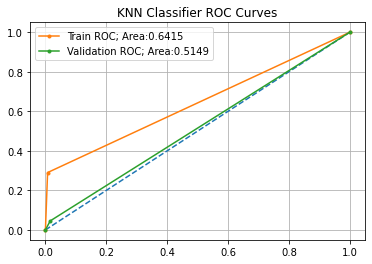

In [37]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_imb, y_train_imb)
knn_pred = knn.predict(X_train_imb)
knn_val_pred = knn.predict(X_test)

print(confusion_matrix(Y_test,knn_val_pred),'\n')
print(classification_report(Y_test,knn_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, knn_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, knn_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("KNN Classifier ROC Curves")

[[27498   546]
 [ 1692   264]] 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     28044
           1       0.33      0.13      0.19      1956

    accuracy                           0.93     30000
   macro avg       0.63      0.56      0.58     30000
weighted avg       0.90      0.93      0.91     30000



Text(0.5, 1.0, 'KNN Standardized Classifier ROC Curves')

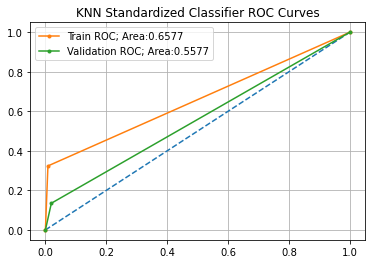

In [38]:
# KNN - Standard scale
knn_ss = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
knn_ss.fit(X_train_imb, y_train_imb)
knn_ss_pred = knn_ss.predict(X_train_imb)
knn_ss_val_pred = knn_ss.predict(X_test)

print(confusion_matrix(Y_test,knn_ss_val_pred),'\n')
print(classification_report(Y_test,knn_ss_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, knn_ss_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, knn_ss_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("KNN Standardized Classifier ROC Curves")

[[27642   402]
 [ 1525   431]] 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.52      0.22      0.31      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.60      0.64     30000
weighted avg       0.92      0.94      0.92     30000



Text(0.5, 1.0, 'MLP Standardized Classifier ROC Curves')

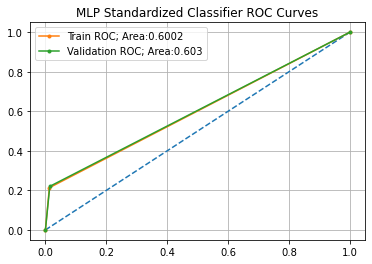

In [39]:
# MLP - Standard scale
mlp_ss = make_pipeline(StandardScaler(), MLPClassifier(early_stopping=False, hidden_layer_sizes=(100,), learning_rate='adaptive', max_iter=1000, random_state=42))
mlp_ss.fit(X_train_imb, y_train_imb)
mlp_ss_pred = mlp_ss.predict(X_train_imb)
mlp_ss_val_pred = mlp_ss.predict(X_test)

print(confusion_matrix(Y_test,mlp_ss_val_pred),'\n')
print(classification_report(Y_test,mlp_ss_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, mlp_ss_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, mlp_ss_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("MLP Standardized Classifier ROC Curves")

[[27659   385]
 [ 1554   402]] 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.51      0.21      0.29      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.60      0.63     30000
weighted avg       0.92      0.94      0.92     30000



Text(0.5, 1.0, 'AdaBoost Classifier ROC Curves')

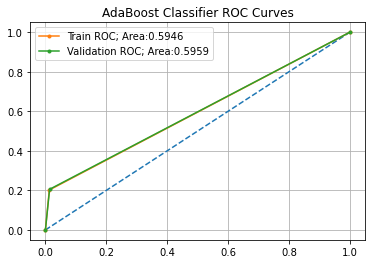

In [40]:
# AdaBoost Classifier
ada = AdaBoostClassifier(algorithm='SAMME.R', random_state=42)
ada.fit(X_train_imb, y_train_imb)
ada_pred = ada.predict(X_train_imb)
ada_val_pred = ada.predict(X_test)

print(confusion_matrix(Y_test,ada_val_pred),'\n')
print(classification_report(Y_test,ada_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, ada_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, ada_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("AdaBoost Classifier ROC Curves")

[[27791   253]
 [ 1640   316]] 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     28044
           1       0.56      0.16      0.25      1956

    accuracy                           0.94     30000
   macro avg       0.75      0.58      0.61     30000
weighted avg       0.92      0.94      0.92     30000



Text(0.5, 1.0, 'XgBoost Classifier ROC Curves')

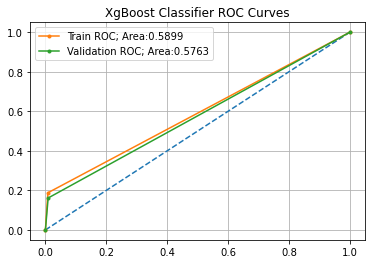

In [41]:
gb_ss = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=42))
gb_ss.fit(X_train_imb, y_train_imb)
gb_pred = gb_ss.predict(X_train_imb)
gb_val_pred = gb_ss.predict(X_test)

print(confusion_matrix(Y_test,gb_val_pred),'\n')
print(classification_report(Y_test,gb_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, gb_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, gb_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("XgBoost Classifier ROC Curves")

## Ensemble classifiers

[[27682   362]
 [ 1621   335]] 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     28044
           1       0.48      0.17      0.25      1956

    accuracy                           0.93     30000
   macro avg       0.71      0.58      0.61     30000
weighted avg       0.91      0.93      0.92     30000



Text(0.5, 1.0, 'Stacking Ensemble Classifier ROC Curves')

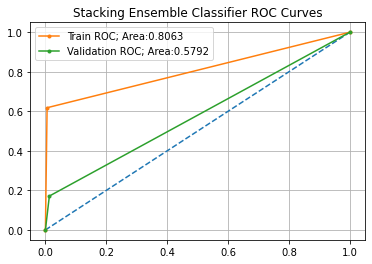

In [42]:
# Stacking classifier
estimators = [('rf', rf), ('dtc', dtc),('ada', ada),('gb_ss', gb_ss),
('mlp_ss', mlp_ss),('knn_ss', knn_ss),('knn', knn)]
stack = StackingClassifier(estimators=estimators, final_estimator=rf)
stack.fit(X_train_imb, y_train_imb)

stack_pred = stack.predict(X_train_imb)
stack_val_pred = stack.predict(X_test)

print(confusion_matrix(Y_test,stack_val_pred),'\n')
print(classification_report(Y_test,stack_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, stack_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, stack_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')

plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("Stacking Ensemble Classifier ROC Curves")

[[27678   366]
 [ 1593   363]] 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.50      0.19      0.27      1956

    accuracy                           0.93     30000
   macro avg       0.72      0.59      0.62     30000
weighted avg       0.92      0.93      0.92     30000



Text(0.5, 1.0, 'Voting soft Ensemble Classifier ROC Curves')

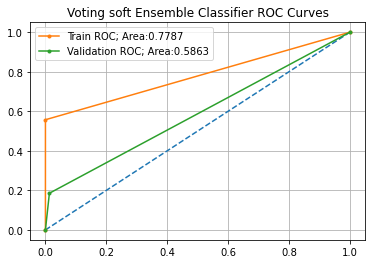

In [43]:
# Voting soft classifier
estimators = [('rf', rf), ('dtc', dtc),('ada', ada),('mlp_ss', mlp_ss),('gb_ss', gb_ss)]
voting = VotingClassifier(estimators=estimators, voting='soft')
voting.fit(X_train_imb, y_train_imb)
vs_pred = voting.predict(X_train_imb)
vs_val_pred = voting.predict(X_test)

print(confusion_matrix(Y_test,vs_val_pred),'\n')
print(classification_report(Y_test,vs_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, vs_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, vs_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("Voting soft Ensemble Classifier ROC Curves")

[[27738   306]
 [ 1599   357]] 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.54      0.18      0.27      1956

    accuracy                           0.94     30000
   macro avg       0.74      0.59      0.62     30000
weighted avg       0.92      0.94      0.92     30000



Text(0.5, 1.0, 'Voting hard Ensemble Classifier ROC Curves')

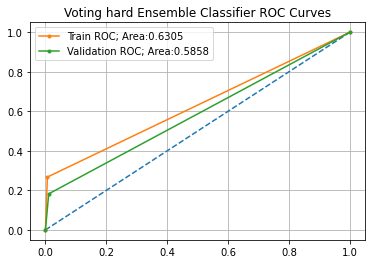

In [44]:
# Voting hard classifier
estimators = [('rf', rf), ('dtc', dtc),('ada', ada),('mlp_ss', mlp_ss),('gb_ss', gb_ss)]
votingH = VotingClassifier(estimators=estimators, voting='hard')
votingH.fit(X_train_imb, y_train_imb)
vh_pred = votingH.predict(X_train_imb)
vh_val_pred = votingH.predict(X_test)

print(confusion_matrix(Y_test,vh_val_pred),'\n')
print(classification_report(Y_test,vh_val_pred))

fpr, tpr, _ = roc_curve(y_train_imb, vh_pred)
val_fpr, val_tpr, _ = roc_curve(Y_test, vh_val_pred)
train_auc = auc(fpr, tpr)
val_auc = auc(val_fpr, val_tpr)

plt.figure()
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, '.-', label=f'Train ROC; Area:{round(train_auc, 4)}')
plt.plot(val_fpr, val_tpr, '.-', label=f'Validation ROC; Area:{round(val_auc, 4)}')
plt.grid(True)
plt.legend(loc="best")
plt.title("Voting hard Ensemble Classifier ROC Curves")

## Selected model

In [55]:
# Save to file in the current working directory
import pickle
pkl_filename = 'final_model.sav'
pickle.dump(stack, open(pkl_filename, 'wb'))

In [56]:
# load the model from disk
model = pickle.load(open("final_model.sav", "rb"))

# Calculate the accuracy score and predict target values
score = model.score(X_test, Y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = model.predict(X_test)
print(Ypredict)

Test score: 93.39 %
[0 0 0 ... 0 0 0]


In [63]:
pd.DataFrame(Ypredict).tail(10)

,0
29990,0
29991,0
29992,0
29993,0
29994,0
29995,0
29996,0
29997,0
29998,0
29999,0
